In [2]:
# Install libraries
!pip install seaborn matplotlib pandas --quiet

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:

# Create output directory
output_dir = "wine_plots"
os.makedirs(output_dir, exist_ok=True)

In [8]:
# Load dataset (upload 'winequality-red.csv' to Colab first)
df = pd.read_csv("winequality-red.csv", sep=";")

# Split the single column into multiple columns
df = df['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'].str.split(',', expand=True)

# Rename columns
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Convert columns to numeric
for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.head())
display(df.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

In [38]:
# -----------------------------------
# 1. Basic Description
# -----------------------------------
print(" Column Names:")
print(df.columns.tolist())

print("\n Dataset Info:")
df.info()

# print("\n Summary Statistics:")
# print(df.describe())

print("\n Target Variable:")
print("Target: 'quality' (Score from 0 to 10)")


 Column Names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality    

In [16]:
for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  0 non-null      float64
dtypes: float64(1)
memory usage: 12.6 KB


None

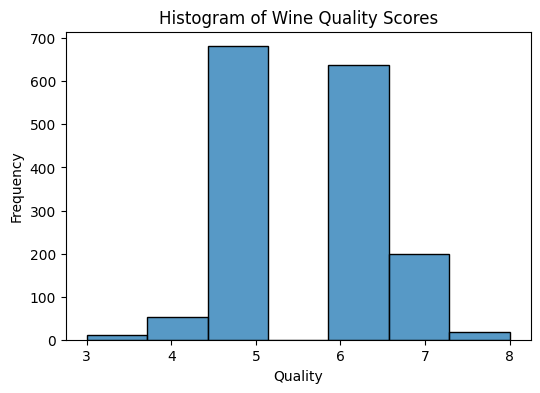

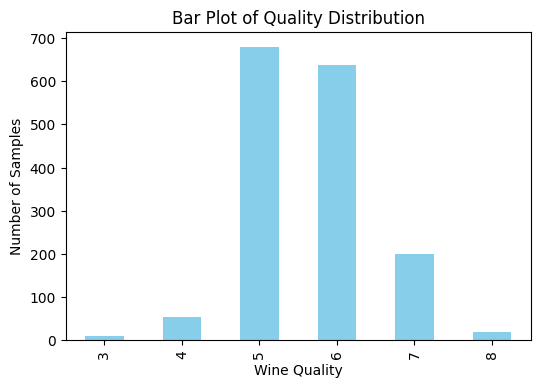

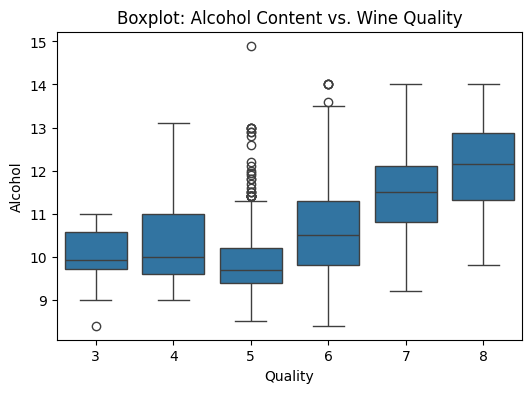

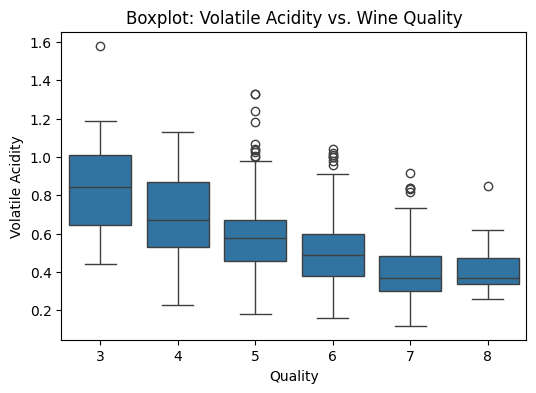

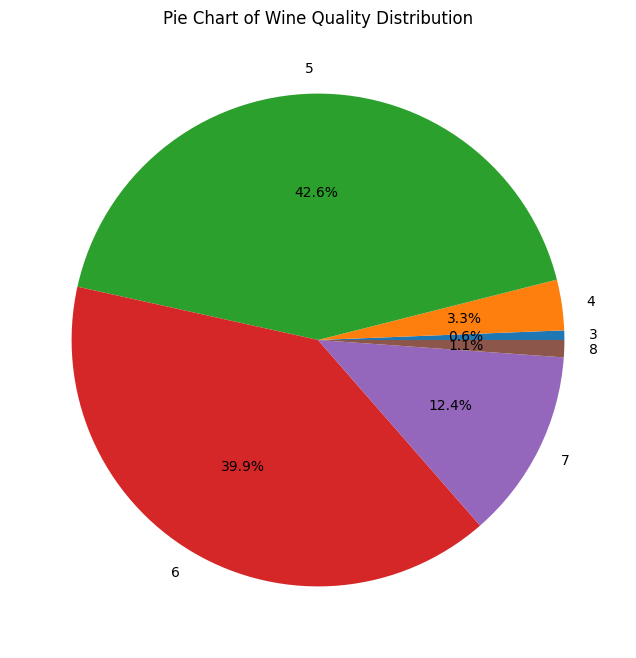

In [9]:
# -----------------------------------
# 2. Data Visualization
# -----------------------------------

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['quality'], bins=7, kde=False)
plt.title("Histogram of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.savefig(f"{output_dir}/histogram_quality.png")
plt.show()

# Bar plot
plt.figure(figsize=(6,4))
df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Bar Plot of Quality Distribution")
plt.xlabel("Wine Quality")
plt.ylabel("Number of Samples")
plt.savefig(f"{output_dir}/barplot_quality.png")
plt.show()

# Boxplot: Alcohol
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Boxplot: Alcohol Content vs. Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.savefig(f"{output_dir}/boxplot_alcohol.png")
plt.show()

# Boxplot: Volatile Acidity
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title("Boxplot: Volatile Acidity vs. Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Volatile Acidity")
plt.savefig(f"{output_dir}/boxplot_volatile_acidity.png")
plt.show()

# Pie Chart
plt.figure(figsize=(8,8))
df['quality'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of Wine Quality Distribution")
plt.ylabel("")
plt.savefig(f"{output_dir}/pie_quality_distribution.png")
plt.show()

In [36]:
# -----------------------------------
# 3. Distribution Analysis
# -----------------------------------

# Skewness
print("\n Skewness of Features:")
print(df.skew(numeric_only=True))

# print("\n")
# print(df.corr(numeric_only=True)['quality'].sort_values(ascending=False).round(2))


# Class Distribution
print("\n Class Distribution:")
print(df['quality'].value_counts().sort_index())


 Skewness of Features:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

 Class Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


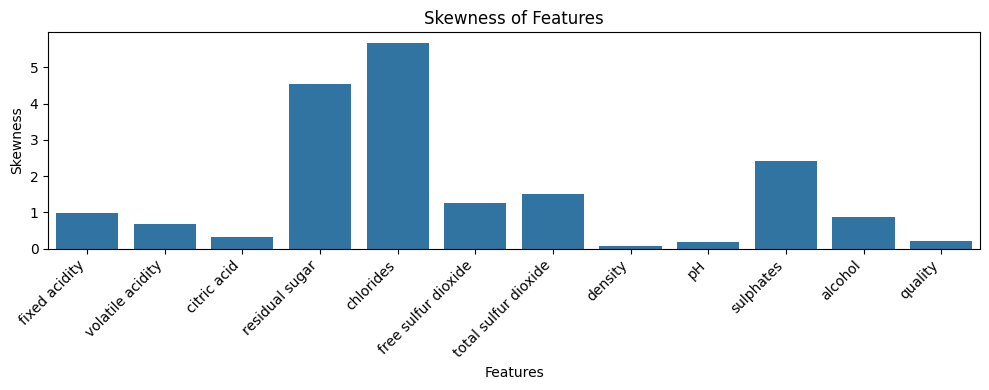

In [10]:
# Skewness distribution graph
skewness = df.skew(numeric_only=True)
plt.figure(figsize=(10, 4))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f"{output_dir}/barplot_skewness.png")
plt.show()


 Value Ranges:
fixed acidity: Min=4.6, Max=15.9
volatile acidity: Min=0.12, Max=1.58
citric acid: Min=0.0, Max=1.0
residual sugar: Min=0.9, Max=15.5
chlorides: Min=0.012, Max=0.611
free sulfur dioxide: Min=1.0, Max=72.0
total sulfur dioxide: Min=6.0, Max=289.0
density: Min=0.99007, Max=1.00369
pH: Min=2.74, Max=4.01
sulphates: Min=0.33, Max=2.0
alcohol: Min=8.4, Max=14.9
quality: Min=3, Max=8

 Outliers (using IQR):
fixed acidity: 49 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 155 outliers
chlorides: 112 outliers
free sulfur dioxide: 30 outliers
total sulfur dioxide: 55 outliers
density: 45 outliers
pH: 35 outliers
sulphates: 59 outliers
alcohol: 13 outliers
quality: 28 outliers


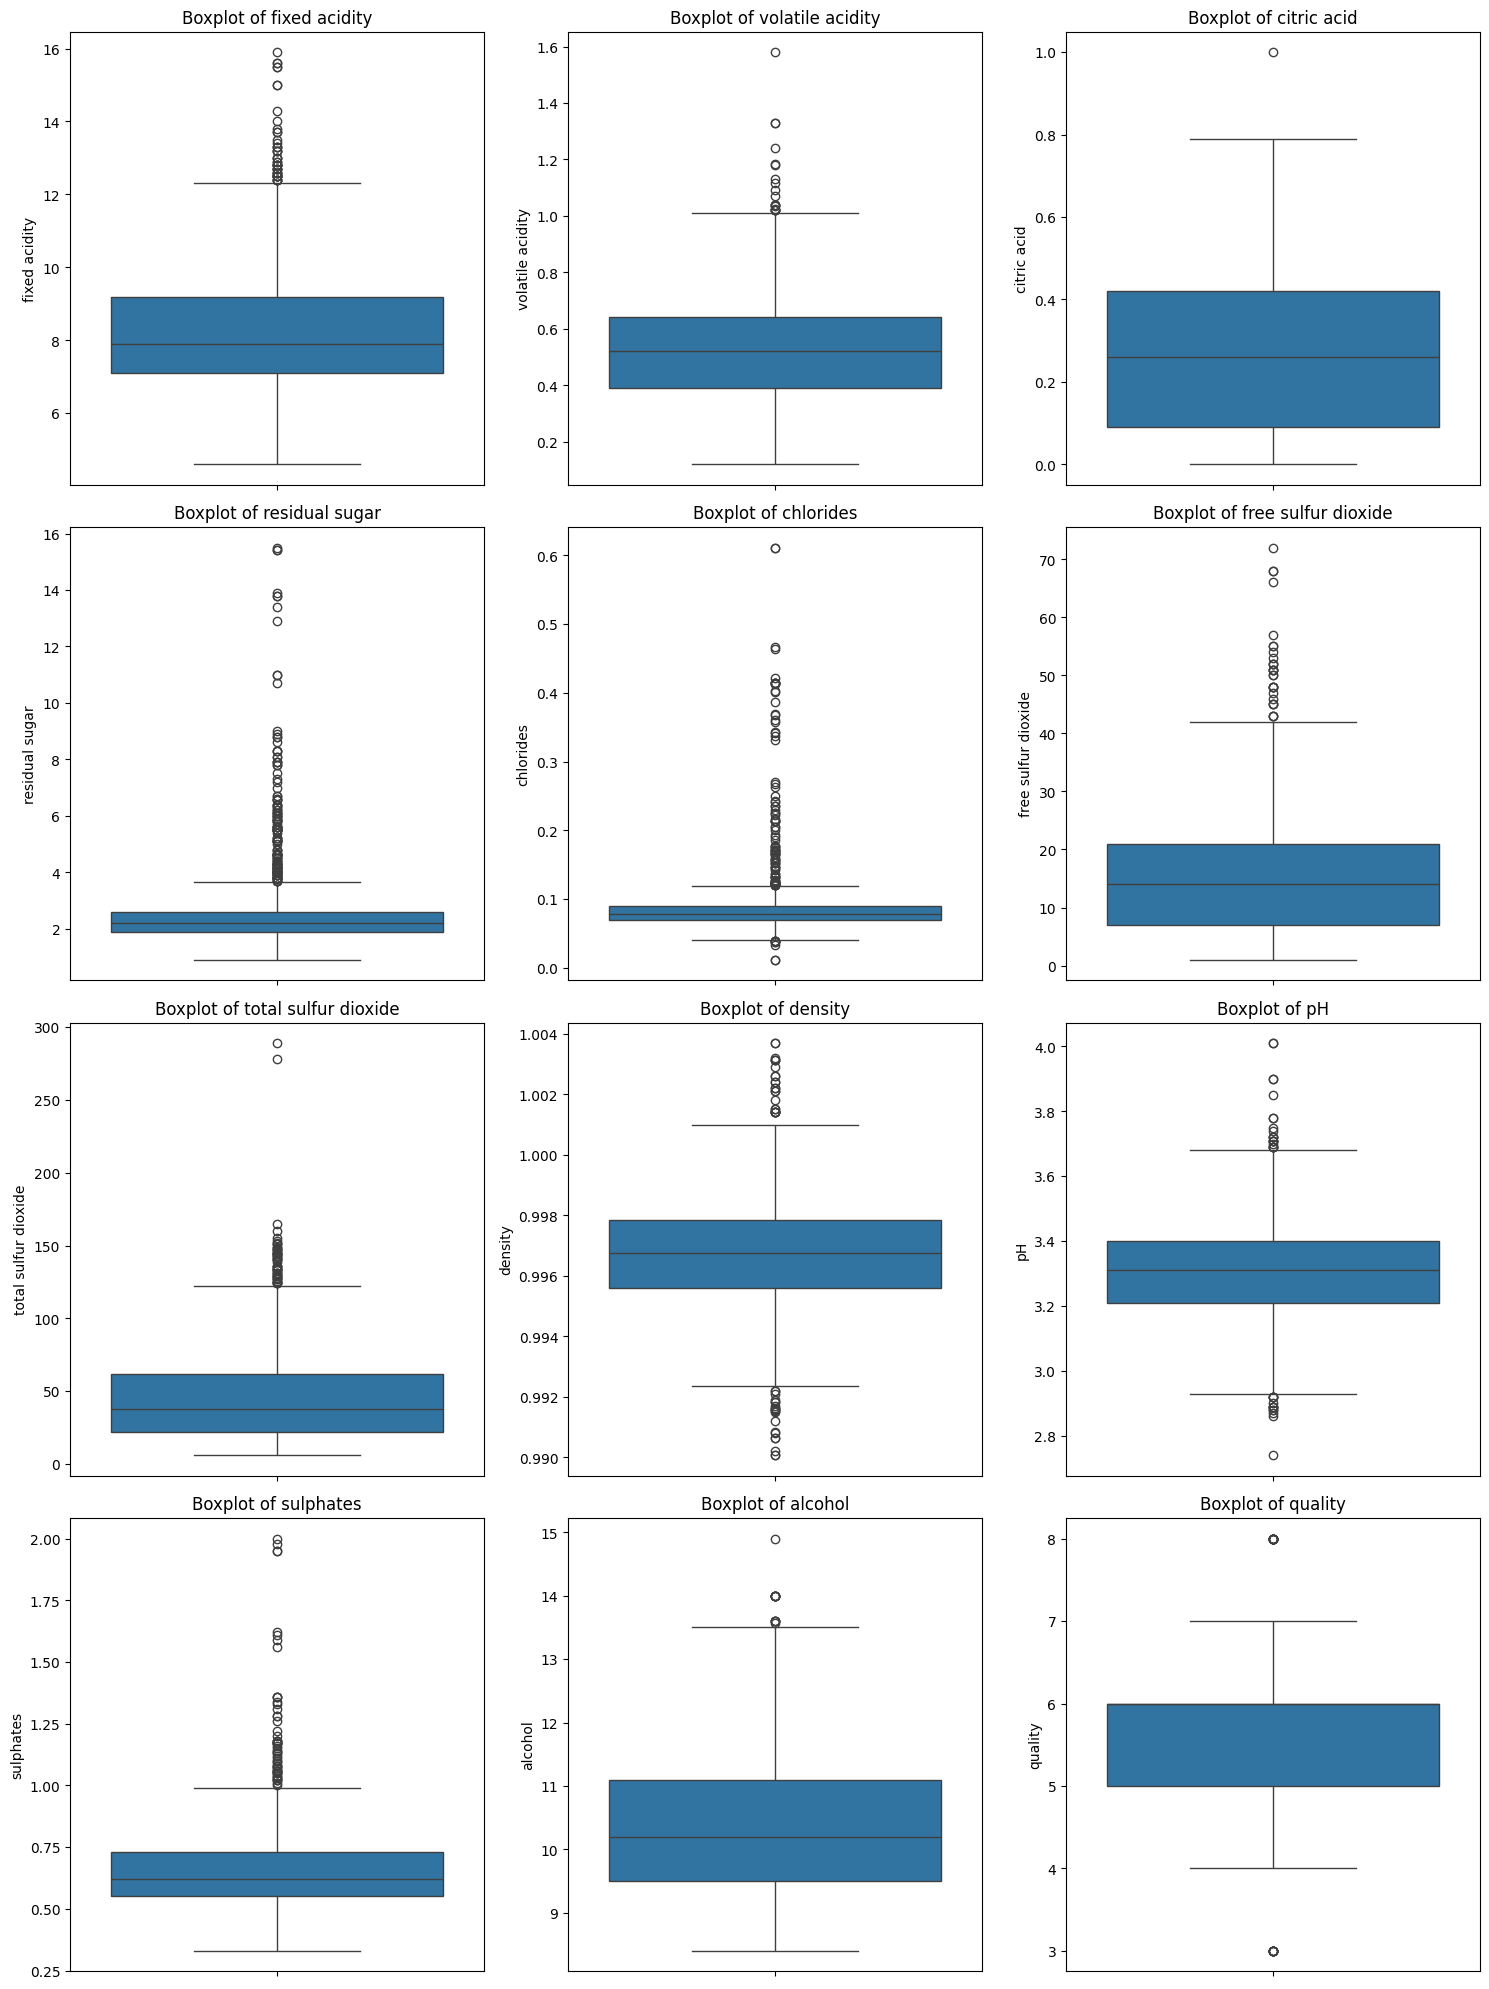

In [11]:
# prompt: Value ranges and outliers

# Value Ranges and Outliers
print("\n Value Ranges:")
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        print(f"{col}: Min={df[col].min()}, Max={df[col].max()}")

print("\n Outliers (using IQR):")
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers")
# Boxplots for all numerical features to visualize outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_plots = len(numerical_cols)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig(f"{output_dir}/boxplots_all_features.png")
plt.show()

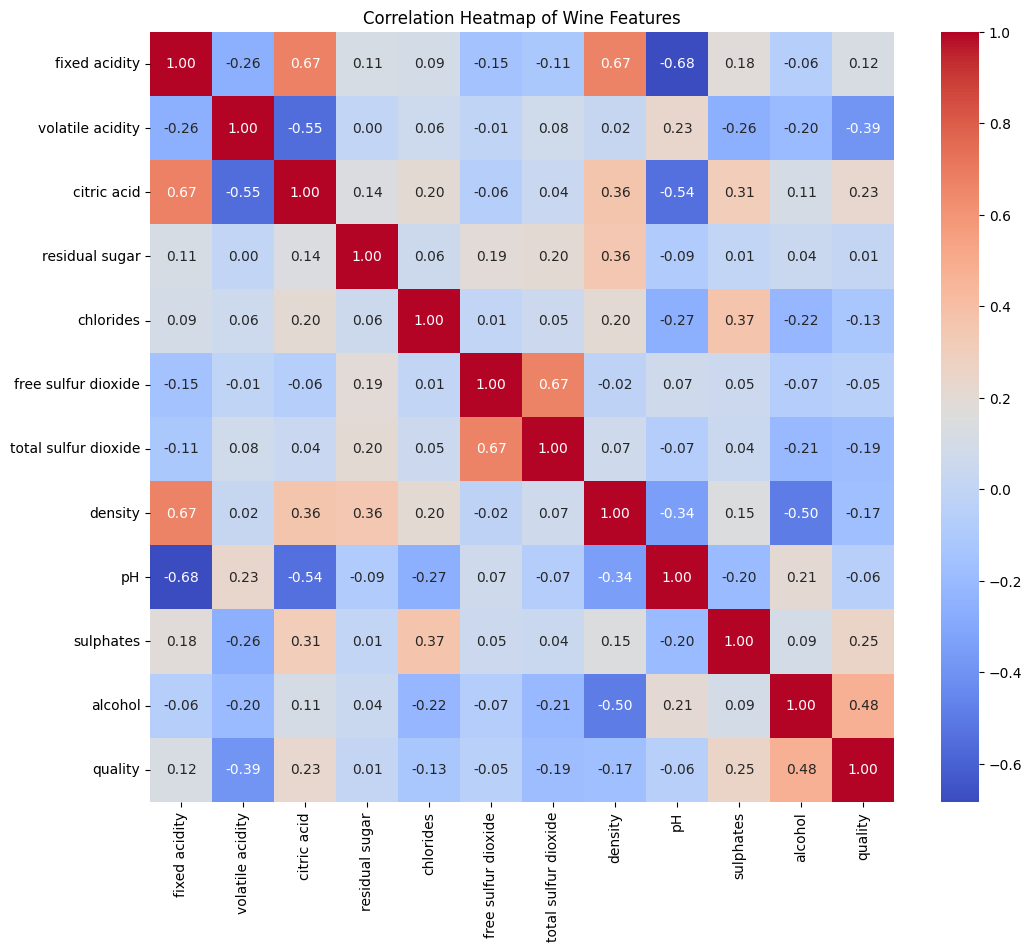

In [12]:
# 4. Correlation Analysis
# -----------------------------------

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Wine Features")
plt.savefig(f"{output_dir}/correlation_heatmap.png")
plt.show()

In [25]:
# Top correlations with quality
print("\n Features most correlated with wine quality:")
print(df.corr(numeric_only=True)['quality'].sort_values(ascending=False))


 Features most correlated with wine quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64
